# ライブラリ調整

In [1]:
# !conda list opencv

# packages in environment at /Users/user/anaconda3:
#
# Name                    Version                   Build  Channel
libopencv                 4.2.0                    py37_2    conda-forge
opencv                    4.2.0                    py37_2    conda-forge
opencv-contrib-python     3.4.2.16                 pypi_0    pypi
opencv-python             3.4.2.16                 pypi_0    pypi
py-opencv                 4.2.0            py37h5ca1d4c_2    conda-forge


In [2]:
# SIFTを使用できるようにバージョンを下げる
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16

In [3]:
# !conda list opencv

# packages in environment at /Users/user/anaconda3:
#
# Name                    Version                   Build  Channel
libopencv                 4.2.0                    py37_2    conda-forge
opencv                    4.2.0                    py37_2    conda-forge
opencv-contrib-python     3.4.2.16                 pypi_0    pypi
opencv-python             3.4.2.16                 pypi_0    pypi
py-opencv                 4.2.0            py37h5ca1d4c_2    conda-forge


In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# WEBサイトコピー　https://www.tech-tech.xyz/sift-surf-akaze.html

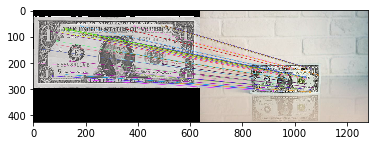

In [2]:
# WEBサイトコピー
img1 = cv2.imread('example_opencv_data/dollar.png')
img2 = cv2.imread('example_opencv_data/dollar_in_scene.png')

#特徴抽出機の生成
detector = cv2.xfeatures2d.SIFT_create()
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.5
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
# cv2.imwrite("shift_result.png", img3)

plt.imshow(img3)
plt.show()

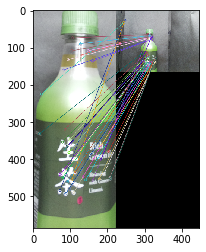

In [45]:
# 正解でテスト
img1 = cv2.imread('example_pet-bottle-pic/temp/生茶.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('example_pet-bottle-pic/image.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


## resize
scale = 224 / img1.shape[1]
img1 = cv2.resize(img1, dsize=None, fx=scale, fy=scale)
## resize
scale = 224 / img2.shape[1]
img2 = cv2.resize(img2, dsize=None, fx=scale, fy=scale)

#特徴抽出機の生成
detector = cv2.xfeatures2d.SIFT_create(contrastThreshold = 0.04, nfeatures=0, edgeThreshold = 4, sigma = 1)
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.775
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
# cv2.imwrite("shift_result.png", img3)

plt.imshow(img3)
plt.show()

In [46]:
print(img1.shape)
print(img2.shape)

(586, 224, 3)
(168, 224, 3)


In [16]:
des1.dtype

dtype('float32')

In [17]:
len(kp1)

290

* 正解画像では特徴点が上手く捕らえられている

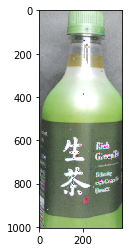

In [18]:
# 特徴点の表示
# テンプレート
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.imshow(out1)
plt.show()

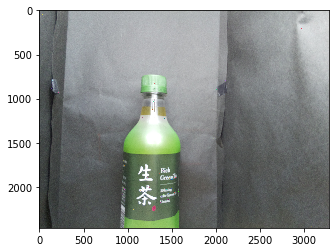

In [19]:
# 特徴点の表示
# オリジナルデータ
out2 = cv2.drawKeypoints(img2, kp2, None)
plt.imshow(out2)
plt.show()

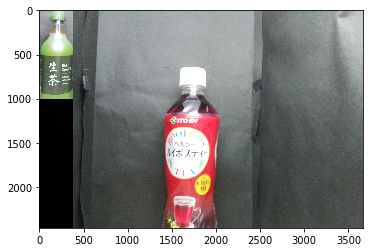

In [22]:
# 不正解でテスト
img1 = cv2.imread('example_pet-bottle-pic/temp/生茶.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('example_pet-bottle-pic/image1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#特徴抽出機の生成
detector = cv2.xfeatures2d.SIFT_create()
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.5
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
# cv2.imwrite("shift_result.png", img3)

plt.imshow(img3)
plt.show()

* 不正解ラベルではマッチする特徴点がなく、正解と不正解を分離できている

# 正解、不正解データで評価
* 画像データはネットから取得し、ローカルに保存したものを使用

In [58]:
# 商品と価格の辞書（これをもとに金額を表示、合計する）
item_price = {'ジャスミンティー':100, '生茶':110, 'CCレモン':120, 
              'アクエリアス':130, '北海道の強炭酸水':140, 'ペプシ':150,
              'ヘルシールイボスティー':160, 'ジョージアブラック':170}

In [52]:
# テンプレート画像読み込み
path = "./example_pet-bottle-pic/temp"
temp_files = os.listdir(path)
temp_files = [files for files in temp_files if files.endswith("png")]
print(temp_files)

# テンプレートをarrayとしてリスト化
temp_data = []
for n, data in enumerate(temp_files):
    temp = cv2.imread("example_pet-bottle-pic/temp/" + data)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    temp_data.append(temp)

['ジャスミンティー.png', '生茶.png', 'CCレモン.png', 'アクエリアス.png', '北海道の強炭酸水.png', 'ペプシ.png', 'ヘルシールイボスティー.png', 'ジョージアブラック.png']


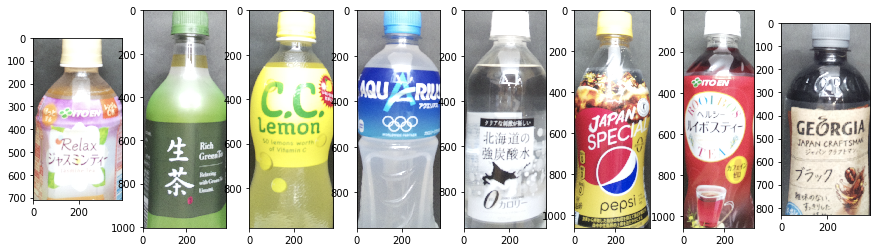

In [53]:
# テンプレート画像の表示（確認用）
plt.subplots(1, len(temp_data) ,figsize=(15, 4))
for n, img in enumerate(temp_data):
    plt.subplot(1, len(temp_data), n+1)
    plt.imshow(img)
plt.show()

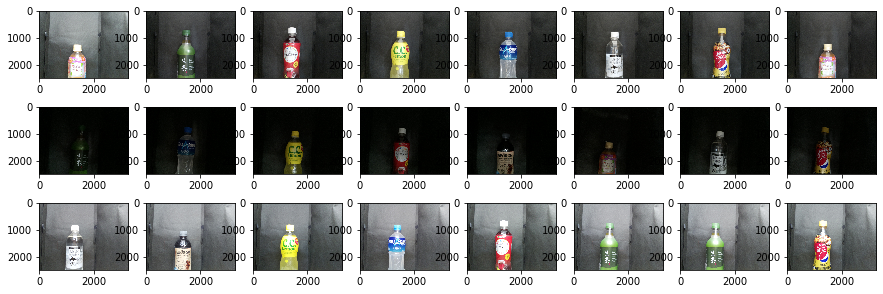

In [54]:
# テンプレートに対する正解データ
path = "./example_pet-bottle-pic"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpg")]
plt.subplots(3, 8 ,figsize=(15, 5))
for n, data in enumerate(files):
    img = cv2.imread("example_pet-bottle-pic/" + data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 8, n+1)
    plt.imshow(img)
plt.show()

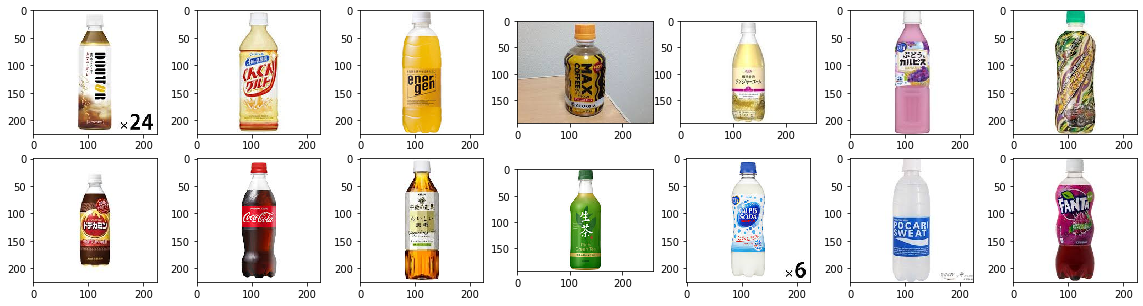

In [55]:
# 不正解データ
path = "./example_opencv_data/不正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
plt.subplots(2, 7 ,figsize=(20, 5))
for n, data in enumerate(files):
    img = cv2.imread("example_opencv_data/不正解/" + data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 7, n+1)
    plt.imshow(img)
plt.show()

In [56]:
# 画像分類
def classfiler(files, path, param=0.59, num=6):
    """
    SIFTを用いた画像分類
    パラメーターとして以下を調整
    param：最も近い点と2番目に近い点の距離の比率。
    num：マッチした特徴点の数の下限
    """
    # 合計金額の初期化
    price_sum = 0
    for data in files:
        #識別したい画像を読み込む
        img = cv2.imread(path + "/" + data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # 画像マッチング
        for temp, temp_file in zip(temp_data, temp_files):
            
            
            ## resize
            scale = 224 / temp.shape[1]
            temp = cv2.resize(temp, dsize=None, fx=scale, fy=scale)
            ## resize
            scale = 224 / img.shape[1]
            img = cv2.resize(img, dsize=None, fx=scale, fy=scale)
            
            
            #特徴抽出機の生成
            detector = cv2.xfeatures2d.SIFT_create()
            #kpは特徴的な点の位置 destは特徴を現すベクトル
            kp1, des1 = detector.detectAndCompute(temp, None)
            kp2, des2 = detector.detectAndCompute(img, None)
            
            
            print(len(kp1))
            print(len(kp2))
            
            
            #特徴点の比較機
            bf = cv2.BFMatcher(cv2.NORM_L2)
            matches = bf.knnMatch(des1,des2, k=2)
            #割合試験を適用(２番目との差を param)
            good = []
            match_param = param
            for m,n in matches:
                if m.distance < match_param*n.distance:
                    good.append([m])
            # good特徴点 num 個以上でマッチしたとする
            if len(good)>num:
                
                
                # テンプレート表示
                plt.subplots(1,2,figsize=(5, 5))
                plt.subplot(1,2,1)
                plt.title('temp')
                plt.imshow(temp)
                # origin表示
                plt.subplot(1,2,2)
                plt.title('origin')
                plt.imshow(img)
                plt.show()
                
                
                # デバッグ
                # 特徴量の数
                print(len(kp1))
                #cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
                img_match = cv2.drawMatchesKnn(temp,kp1,img,kp2,good, None,flags=2)
                plt.imshow(img_match)
                plt.show()
                
                # 値段表示
                item = temp_file.strip(".png'")
                price = item_price[item]
                price_sum += price
                print("{}：{}円".format(item, price))
                print("合計金額：", price_sum, "円")

398
74


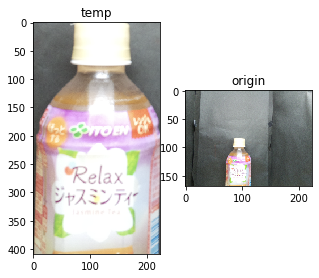

398


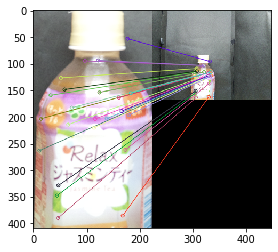

ジャスミンティー：100円
合計金額： 100 円
320
74
242
74
266
74
538
74
791
74
416
74
668
74
398
59
320
59


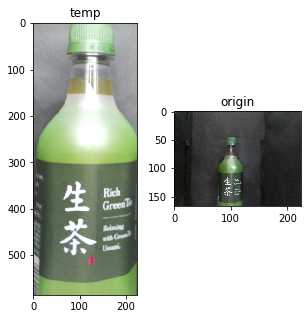

320


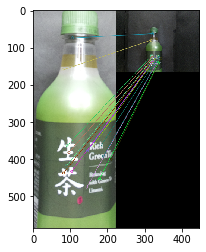

生茶：110円
合計金額： 210 円
242
59
266
59
538
59
791
59
416
59
668
59
398
61
320
61
242
61
266
61
538
61
791
61
416
61


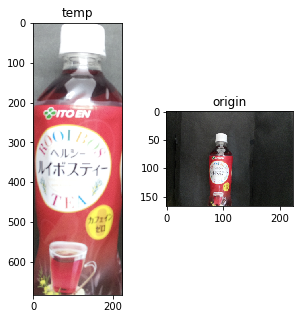

416


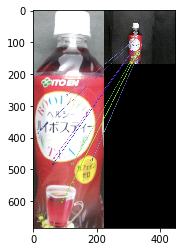

ヘルシールイボスティー：160円
合計金額： 370 円
668
61
398
80
320
80
242
80


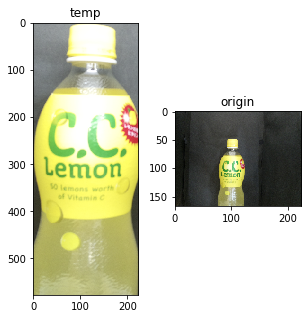

242


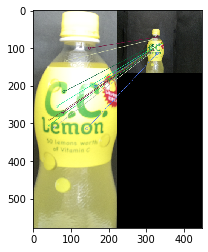

CCレモン：120円
合計金額： 490 円
266
80
538
80
791
80
416
80
668
80
398
55
320
55
242
55
266
55
538
55
791
55
416
55
668
55
398
66
320
66
242
66
266
66
538
66


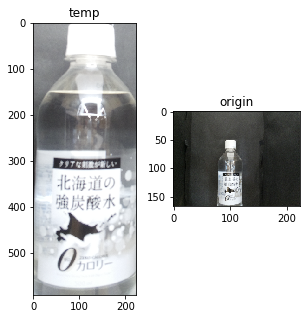

538


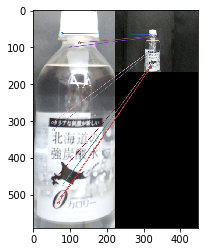

北海道の強炭酸水：140円
合計金額： 630 円
791
66
416
66
668
66
398
92
320
92
242
92
266
92
538
92
791
92


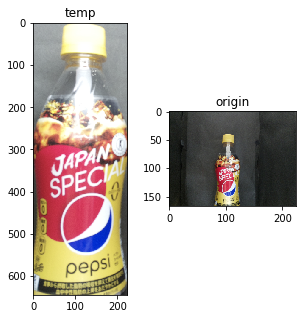

791


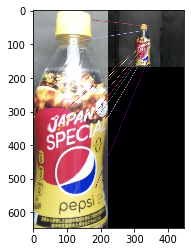

ペプシ：150円
合計金額： 780 円
416
92
668
92
398
45


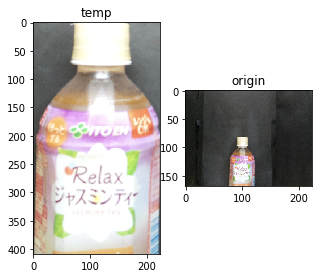

398


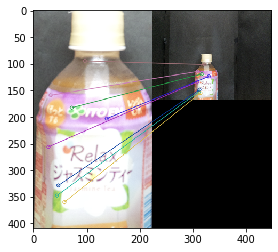

ジャスミンティー：100円
合計金額： 880 円
320
45
242
45
266
45
538
45
791
45
416
45
668
45
398
13
320
13
242
13
266
13
538
13
791
13
416
13
668
13
398
29
320
29
242
29
266
29
538
29
791
29
416
29
668
29
398
51
320
51
242
51
266
51
538
51
791
51
416
51
668
51
398
40
320
40
242
40
266
40
538
40
791
40
416
40
668
40
398
48
320
48
242
48
266
48
538
48
791
48
416
48
668
48
398
22
320
22
242
22
266
22
538
22
791
22
416
22
668
22
398
51
320
51
242
51
266
51
538
51
791
51
416
51
668
51
398
52
320
52
242
52
266
52
538
52
791
52
416
52
668
52
398
78
320
78
242
78
266
78
538
78


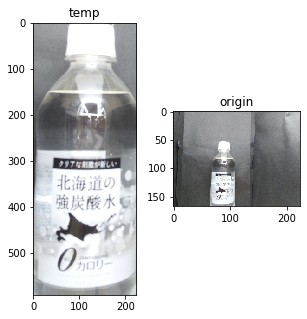

538


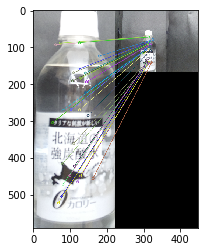

北海道の強炭酸水：140円
合計金額： 1020 円
791
78
416
78
668
78
398
75
320
75
242
75
266
75
538
75
791
75
416
75
668
75


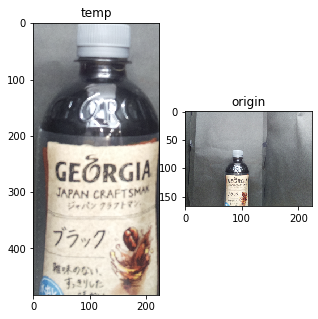

668


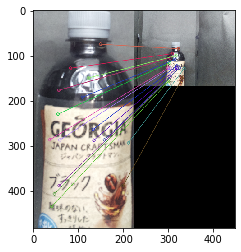

ジョージアブラック：170円
合計金額： 1190 円
398
76
320
76
242
76


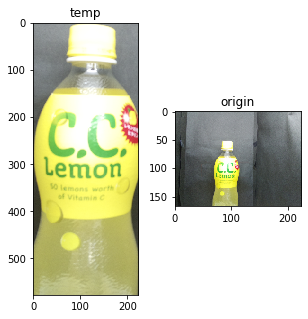

242


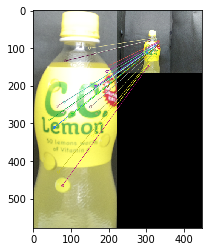

CCレモン：120円
合計金額： 1310 円
266
76
538
76
791
76
416
76
668
76
398
76
320
76
242
76
266
76


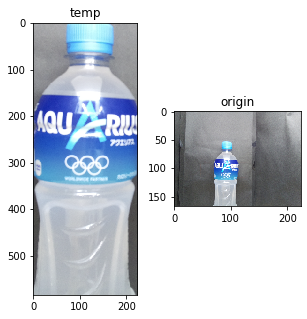

266


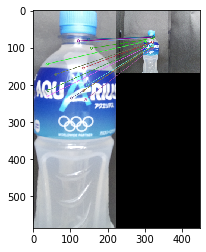

アクエリアス：130円
合計金額： 1440 円
538
76
791
76
416
76
668
76
398
81
320
81
242
81
266
81
538
81
791
81
416
81


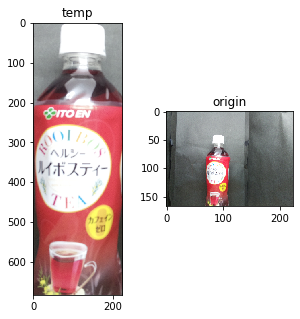

416


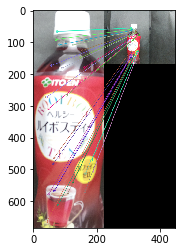

ヘルシールイボスティー：160円
合計金額： 1600 円
668
81
398
93
320
93


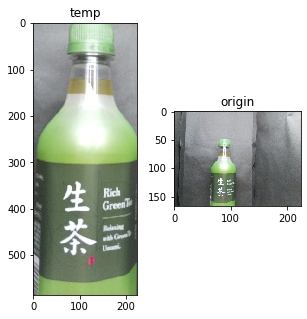

320


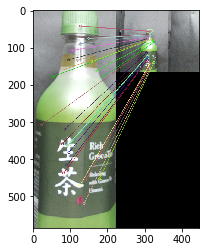

生茶：110円
合計金額： 1710 円
242
93
266
93
538
93
791
93
416
93
668
93
398
84
320
84


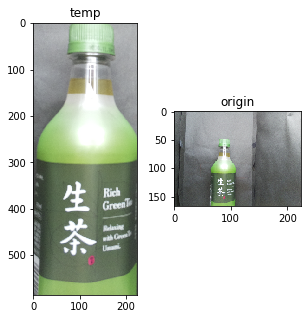

320


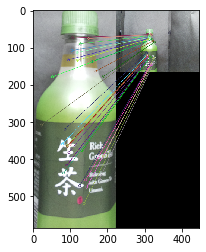

生茶：110円
合計金額： 1820 円
242
84
266
84
538
84
791
84
416
84
668
84
398
112
320
112
242
112
266
112
538
112
791
112


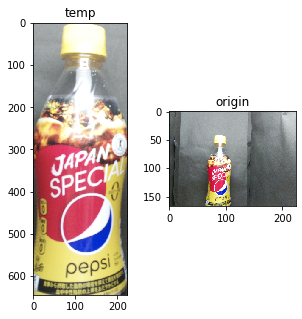

791


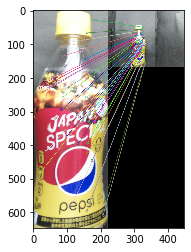

ペプシ：150円
合計金額： 1970 円
416
112
668
112


In [59]:
# 正解データ
# contrastThreshold = 0.17, nfeatures=0
path = "./example_pet-bottle-pic"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpg")]
classfiler(files, path, param=0.59, num=6)

398
161
320
161
242
161
266
161
538
161
791
161
416
161
668
161
398
224
320
224
242
224
266
224
538
224
791
224
416
224
668
224
398
136
320
136
242
136
266
136
538
136
791
136
416
136
668
136
398
162
320
162
242
162
266
162
538
162
791
162
416
162
668
162
398
95
320
95
242
95
266
95
538
95
791
95
416
95
668
95
398
189
320
189
242
189
266
189
538
189
791
189
416
189
668
189
398
280
320
280
242
280
266
280
538
280
791
280
416
280


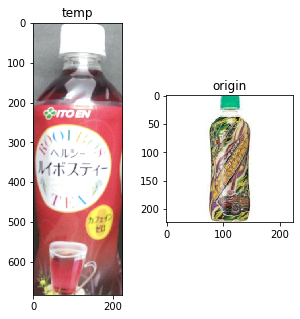

416


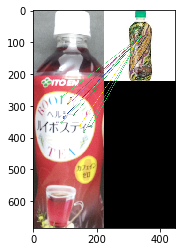

ヘルシールイボスティー：160円
合計金額： 160 円
668
280
398
137
320
137
242
137
266
137
538
137
791
137
416
137
668
137
398
94
320
94
242
94
266
94
538
94
791
94
416
94


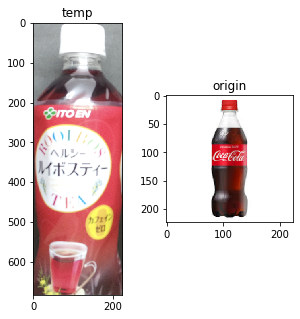

416


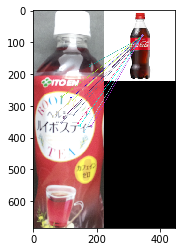

ヘルシールイボスティー：160円
合計金額： 320 円
668
94
398
171
320
171
242
171
266
171
538
171
791
171
416
171
668
171
398
84
320
84
242
84
266
84
538
84
791
84
416
84
668
84
398
179
320
179
242
179
266
179
538
179
791
179
416
179
668
179
398
148
320
148
242
148
266
148
538
148
791
148
416
148
668
148
398
163
320
163
242
163
266
163
538
163
791
163
416
163
668
163


In [61]:
# 不正解データ
path = "./example_opencv_data/不正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
classfiler(files, path, param=0.59, num=6)

### 現状
* 正解データ対しては、商品の角度や明るさに関係なく全て識別できている
* 不正解データに対して、違いが大きさのみの画像（maxコーヒー）以外は識別できている

### 今後
* 現実を考慮すると、不正解データに対しても明るさや角度を変化させた検証が必要
* 実際の写真データで検証
* 各トリガーとの繋ぎ方（処理の流れや、終わり方）

# その他の特徴量抽出方法（上記手法でうまくいかなかった場合検討）

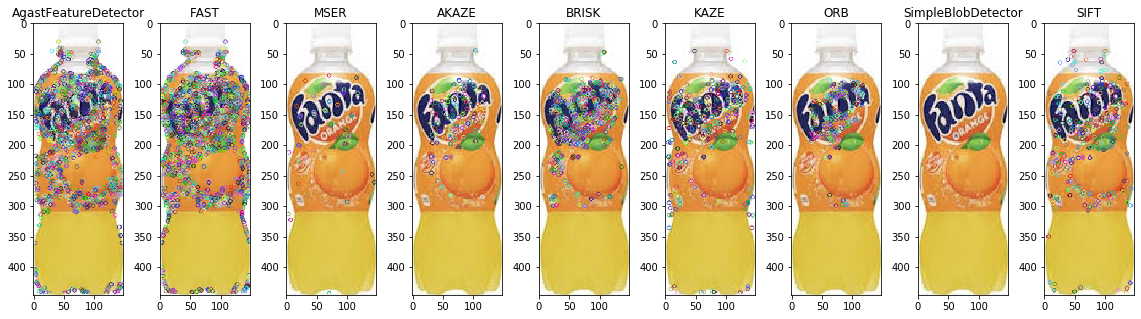

In [447]:
plt.subplots(1,9,figsize=(20, 5))

# AgastFeatureDetector
detector = cv2.AgastFeatureDetector_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,1)
plt.imshow(out1)
plt.title('AgastFeatureDetector')

# FAST
detector = cv2.FastFeatureDetector_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,2)
plt.imshow(out1)
plt.title('FAST')

# MSER
detector = cv2.MSER_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,3)
plt.imshow(out1)
plt.title('MSER')

# AKAZE
detector = cv2.AKAZE_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,4)
plt.imshow(out1)
plt.title('AKAZE')

# BRISK
detector = cv2.BRISK_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,5)
plt.imshow(out1)
plt.title('BRISK')

# KAZE
detector = cv2.KAZE_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,6)
plt.imshow(out1)
plt.title('KAZE')

# ORB (Oriented FAST and Rotated BRIEF)
detector = cv2.ORB_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,7)
plt.imshow(out1)
plt.title('ORB')

# SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,8)
plt.imshow(out1)
plt.title('SimpleBlobDetector')

# SIFT
detector = cv2.xfeatures2d.SIFT_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,9)
plt.imshow(out1)
plt.title('SIFT')

plt.show()

# 方法による比較

In [1489]:
method = {"AgastFeatureDetector" : cv2.AgastFeatureDetector_create(),
          "FastFeatureDetector" : cv2.FastFeatureDetector_create(),
          "MSER" : cv2.MSER_create(),
          "AKAZE" : cv2.AKAZE_create(threshold=0.0001, descriptor_channels=3, diffusivity=3, descriptor_type=4, nOctaveLayers=4),
          "BRISK" : cv2.BRISK_create(thresh = 70, patternScale = 1),
          "KAZE" : cv2.KAZE_create(),
          "ORB" : cv2.ORB_create(),
          "SIFT" : cv2.xfeatures2d.SIFT_create(),
          "SimpleBlobDetector" : cv2.SimpleBlobDetector_create()}

In [1490]:
method["AKAZE"].getDescriptorType()

4

In [1491]:
method["AKAZE"].getThreshold()

9.999999747378752e-05

In [1492]:
# 特徴量抽出
def keypoints(img1, name):
    kp1 = method[name].detect(img1)
    out1 = cv2.drawKeypoints(img1, kp1, None)
    plt.imshow(out1)
    plt.title(name)
    plt.show()
    
# 画像分類
# ORB, AKAZE, KAZE, BRISK, SIFTは、特徴点だけではなく、特徴量も計算できる。
def matches(files, path, name, param=0.5, num=10):
    price_sum = 0
    for data in files:
        #識別したい画像を読み込む
        img = cv2.imread(path + "/" + data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # 画像マッチング
        for temp, temp_file in zip(temp_data, temp_files):
            
            
            ######
            # 前処理
            kernel = np.ones((15,15),np.uint8)
            temp = cv2.morphologyEx(temp, cv2.MORPH_BLACKHAT, kernel)
            img = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
            
            
            #特徴抽出機の生成
            #kpは特徴的な点の位置 destは特徴を現すベクトル
            kp1, des1 = method[name].detectAndCompute(temp, None)
            kp2, des2 = method[name].detectAndCompute(img, None)
            #特徴点の比較機
            bf = cv2.BFMatcher(cv2.NORM_HAMMING)
            matches = bf.knnMatch(des1,des2, k=2)
            #割合試験を適用(２番目との差を param)
            good = []
            match_param = param
            for m,n in matches:
                if m.distance < match_param*n.distance:
                    good.append([m])
            # good特徴点 num 個以上でマッチしたとする
            if len(good)>num:
                # テンプレート表示
                plt.subplots(1,2,figsize=(5, 5))
                plt.subplot(1,2,1)
                plt.title('temp')
                plt.imshow(temp)
                # origin表示
                plt.subplot(1,2,2)
                plt.title('origin')
                plt.imshow(img)
                plt.show()
                
                
                # デバッグ
                # 特徴量の数
                print(len(kp1))
                #cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
                img_match = cv2.drawMatchesKnn(temp,kp1,img,kp2,good, None,flags=2)
                plt.imshow(img_match)
                plt.show()
                
                # 値段表示
                item = temp_file.strip(".png'")
                price = item_price[item]
                price_sum += price
                print("{}：{}円".format(item, price))
                print("合計金額：", price_sum, "円")

176


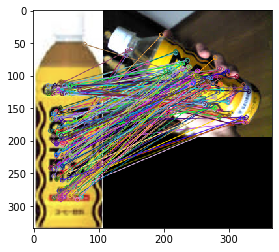

In [1480]:
temp_test = cv2.imread('example_opencv_data/temp/maxコーヒー.png')
temp_test = cv2.cvtColor(temp_test, cv2.COLOR_BGR2RGB)
img_test = cv2.imread('example_opencv_data/正解/maxコーヒー＿手持ち.jpeg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

detector = cv2.BRISK_create(thresh = 40, patternScale = 1)
kp1, des1 = detector.detectAndCompute(temp_test, None)
kp2, des2 = detector.detectAndCompute(img_test, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用(２番目との差を param)
good = []
match_param = 1
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
    
# デバッグ
# 特徴量の数
print(len(kp1))
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img_match = cv2.drawMatchesKnn(temp_test,kp1,img_test,kp2,good, None,flags=2)
plt.imshow(img_match)
plt.show()

123


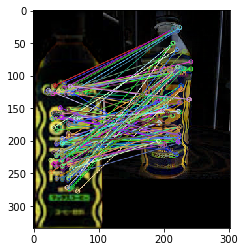

In [1488]:
temp_test = cv2.imread('example_opencv_data/temp/maxコーヒー.png')
temp_test = cv2.cvtColor(temp_test, cv2.COLOR_BGR2RGB)
img_test = cv2.imread('example_opencv_data/正解/maxコーヒー＿テスト.jpeg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

kernel = np.ones((15,15),np.uint8)
# temp_test = cv2.erode(temp_test,kernel,iterations = 1)
# img_test = cv2.erode(img_test,kernel,iterations = 1)
# temp_test = cv2.dilate(temp_test,kernel,iterations = 1)
# img_test = cv2.dilate(img_test,kernel,iterations = 1)
# temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_OPEN, kernel)
# img_test = cv2.morphologyEx(img_test, cv2.MORPH_OPEN, kernel)
# temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_CLOSE, kernel)
# img_test = cv2.morphologyEx(img_test, cv2.MORPH_CLOSE, kernel)
# temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_GRADIENT, kernel)
# img_test = cv2.morphologyEx(img_test, cv2.MORPH_GRADIENT, kernel)
#######
# temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_TOPHAT, kernel)
# img_test = cv2.morphologyEx(img_test, cv2.MORPH_TOPHAT, kernel)
temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_BLACKHAT, kernel)
img_test = cv2.morphologyEx(img_test, cv2.MORPH_BLACKHAT, kernel)

detector = cv2.BRISK_create(thresh = 70, patternScale = 1)
kp1, des1 = detector.detectAndCompute(temp_test, None)
kp2, des2 = detector.detectAndCompute(img_test, None)
#特徴点の比較機
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用(２番目との差を param)
good = []
match_param = 1
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
    
# デバッグ
# 特徴量の数
print(len(kp1))
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img_match = cv2.drawMatchesKnn(temp_test,kp1,img_test,kp2,good, None,flags=2)
plt.imshow(img_match)
plt.show()

119


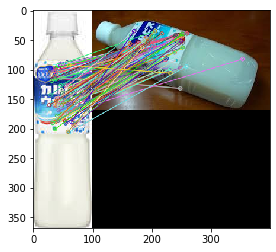

In [1460]:
temp_test = cv2.imread('example_opencv_data/temp/カルピス.png')
temp_test = cv2.cvtColor(temp_test, cv2.COLOR_BGR2RGB)
img_test = cv2.imread('example_opencv_data/正解/カルピス＿テスト.jpeg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

detector = cv2.BRISK_create(thresh = 30, patternScale = 2)
kp1, des1 = detector.detectAndCompute(temp_test, None)
kp2, des2 = detector.detectAndCompute(img_test, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用(２番目との差を param)
good = []
match_param = 1
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
    
# デバッグ
# 特徴量の数
print(len(kp1))
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img_match = cv2.drawMatchesKnn(temp_test,kp1,img_test,kp2,good, None,flags=2)
plt.imshow(img_match)
plt.show()

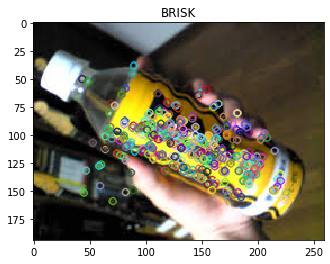

In [1171]:
# BRISK
img_test = cv2.imread('example_opencv_data/正解/maxコーヒー＿手持ち.jpeg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
detector = cv2.BRISK_create(thresh = 30, patternScale = 2)
kp1, des1 = detector.detectAndCompute(img_test, None)
out1 = cv2.drawKeypoints(img_test, kp1, None)
plt.imshow(out1)
plt.title('BRISK')
plt.show()

In [1135]:
des1.dtype

dtype('uint8')

In [1136]:
len(kp1)

28

In [1063]:
detector.getNOctaveLayers()

AttributeError: 'cv2.BRISK' object has no attribute 'getNOctaveLayers'

In [969]:
detector.getDescriptorSize()

AttributeError: 'cv2.BRISK' object has no attribute 'getDescriptorSize'

In [936]:
detector.getDiffusivity()

3

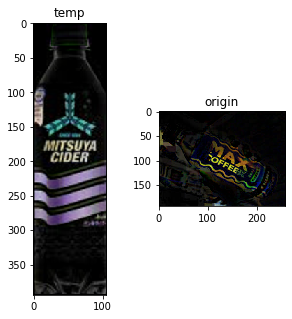

124


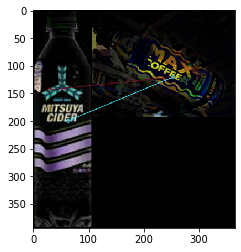

三ツ矢サイダー：140円
合計金額： 140 円


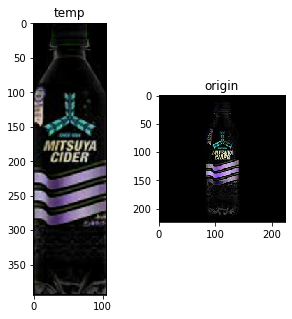

124


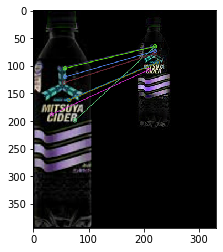

三ツ矢サイダー：140円
合計金額： 280 円


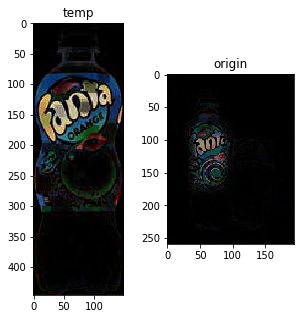

173


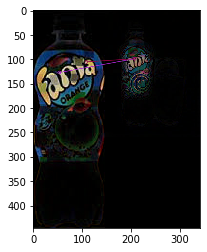

ファンタオレンジ：130円
合計金額： 410 円


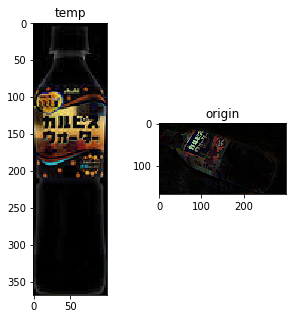

124


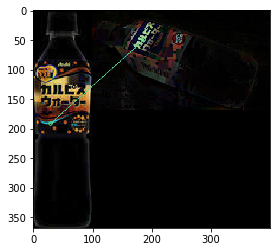

カルピス：110円
合計金額： 520 円


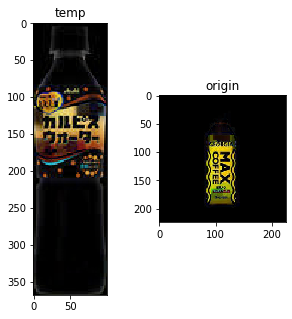

124


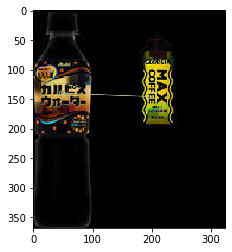

カルピス：110円
合計金額： 630 円


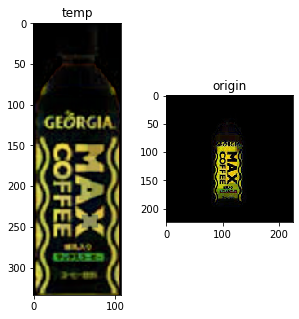

123


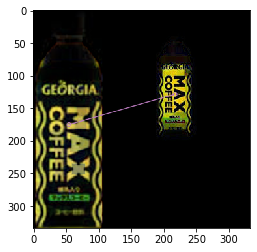

maxコーヒー：100円
合計金額： 730 円


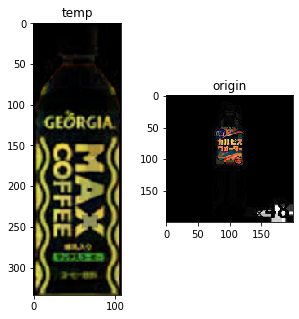

123


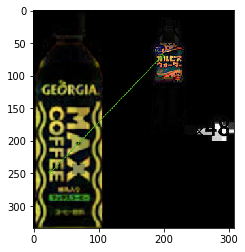

maxコーヒー：100円
合計金額： 830 円


In [1494]:
# ORB, AKAZE, KAZE, BRISK, SIFTは、特徴点だけではなく、特徴量も計算できる。
# 正解データ
path = "./example_opencv_data/正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
matches(files, path, "BRISK", param=0.7, num=0)

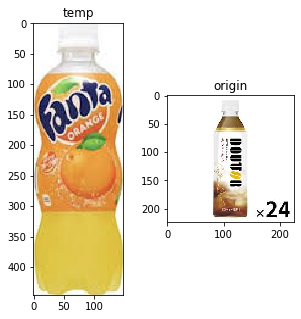

270


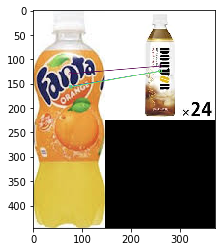

ファンタオレンジ：130円
合計金額： 130 円


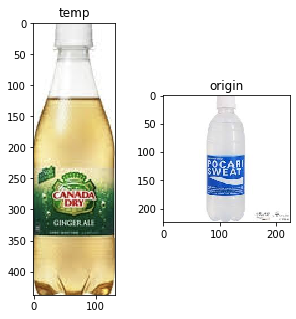

205


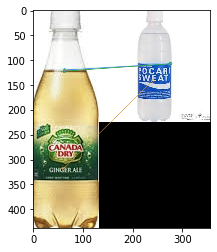

ジンジャエール：120円
合計金額： 250 円


In [1064]:
# 不正解データ
path = "./example_opencv_data/不正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
matches(files, path, "BRISK", param=0.8, num=1)